[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your_github_repo_here/your_notebook.ipynb)


- CUDA: compute unified device architecture.
- PyTorch can accelarate tensor operations using CUDA compatible NVIDIA GPUs.
- GPU is necessary for most of the below code to run

- Using free GPU from colab
- A100 is the fastest commercial GPU
- Colab pro offers more GPU runtime and faster GPUs.
- Kaggle offers better GPUs in free tier but has bad UX.

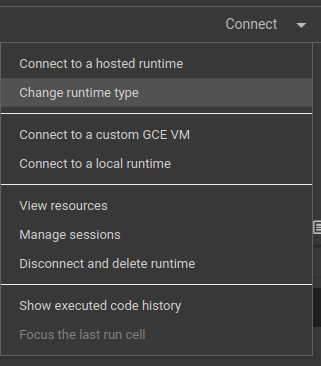

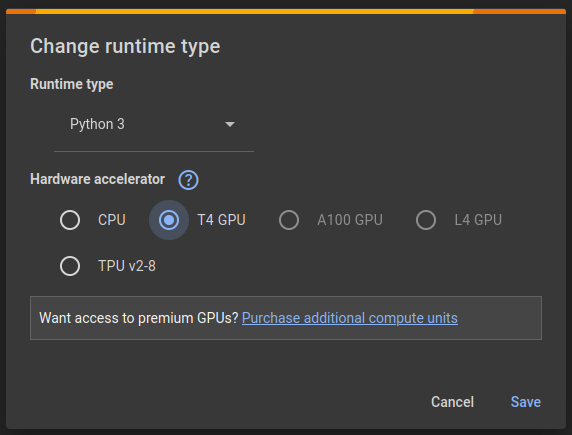

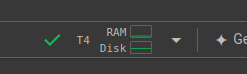

In [2]:
import torch
import pandas as pd
import numpy as np

In [3]:
# checking if GPU is available
# must be True

if torch.cuda.is_available() == True:
  print("GPU is available")
else:
  print("No GPU")

GPU is available


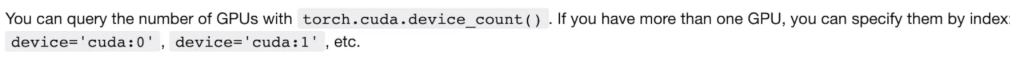

In [4]:
# checking number of GPUs
torch.cuda.device_count()

1

- We need to put data somewhere where GPU can see it
- CPU does computation on computer's RAM.
- GPU has dedicated memory attached to it.
- moving data to GPU means moving data to memory which is accessible to the GPU.
- Bt default tensors are created on the CPU so we have to specify when we want to create the tensor on the GPU

So we set a variable named `device` for the GPU and move the data to the device

In [5]:
if torch.cuda.is_available():
  my_device = torch.device('cuda')
else:
  my_device = torch.device('cpu')


print(f"Current device set up is: {my_device}")

Current device set up is: cuda


Creating a tensor and moving it to the GPU

In [6]:
x = torch.rand(2,2)

In [7]:
x.device

device(type='cpu')

In [8]:
x = x.to(my_device)

In [9]:
x.device

device(type='cuda', index=0)

In [10]:
# creating the tensor directly on the GPU
y = torch.rand(2,2, device = my_device)

In [11]:
y.device

device(type='cuda', index=0)

- The first method is more preferred

# Squeeze vs Unsqueeze

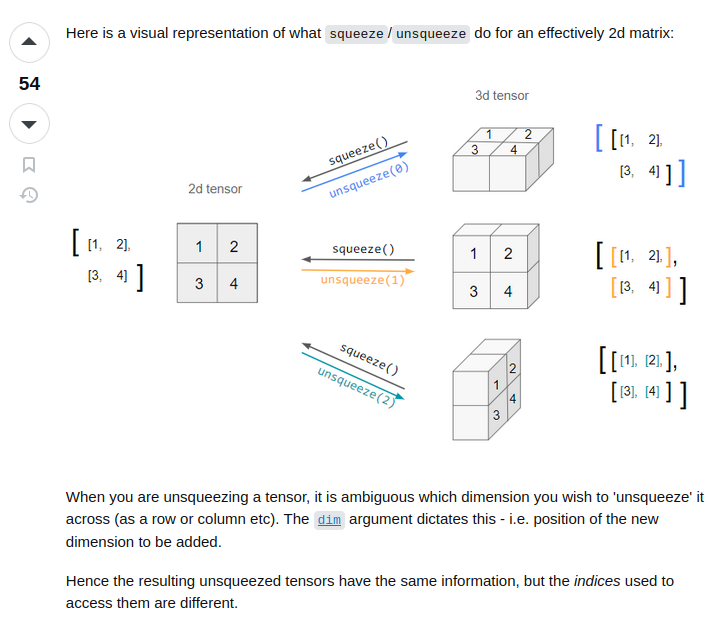

Simply put, unsqueeze() "adds" a superficial 1 dimension to tensor (at the specified dimension), while squeeze removes all superficial 1 dimensions from tensor.

In [12]:
tensor = torch.tensor([1, 0, 2, 3, 4])

In [14]:
tensor.shape

torch.Size([5])

In [15]:
tensor.unsqueeze(dim=0).shape

torch.Size([1, 5])

In [16]:
tensor.unsqueeze(dim=1).shape

torch.Size([5, 1])

In [17]:
a = torch.rand(3, 226, 226)

In [18]:
a

tensor([[[0.9482, 0.1459, 0.7675,  ..., 0.6270, 0.0859, 0.1791],
         [0.3772, 0.8150, 0.9286,  ..., 0.4337, 0.9349, 0.4656],
         [0.0156, 0.9222, 0.6097,  ..., 0.4105, 0.0873, 0.0858],
         ...,
         [0.7510, 0.6124, 0.2905,  ..., 0.7386, 0.4594, 0.6409],
         [0.6200, 0.8996, 0.3433,  ..., 0.9736, 0.8734, 0.7399],
         [0.8413, 0.6235, 0.1571,  ..., 0.3558, 0.3768, 0.3342]],

        [[0.6654, 0.6867, 0.0520,  ..., 0.2528, 0.2091, 0.6284],
         [0.5730, 0.0322, 0.1551,  ..., 0.0570, 0.9333, 0.3585],
         [0.6243, 0.8080, 0.3921,  ..., 0.8488, 0.6716, 0.8924],
         ...,
         [0.2622, 0.9742, 0.5425,  ..., 0.2619, 0.3743, 0.8697],
         [0.6447, 0.1623, 0.2730,  ..., 0.9833, 0.6170, 0.0457],
         [0.5878, 0.9935, 0.8201,  ..., 0.0707, 0.3026, 0.6642]],

        [[0.5079, 0.2258, 0.7676,  ..., 0.5913, 0.8881, 0.2391],
         [0.0063, 0.7935, 0.6283,  ..., 0.8198, 0.2325, 0.0230],
         [0.8205, 0.3956, 0.4437,  ..., 0.6077, 0.2751, 0.

In [19]:
print(a.shape)

torch.Size([3, 226, 226])


In [20]:
b = a.unsqueeze(0)
b.shape

torch.Size([1, 3, 226, 226])

# Reshape

- When we want to change the shape of the tensor more radically.
- `reshape` reshapes the tensor given you request yield the same number of elements as the input tensor has.

In [21]:
torch.rand(6, 20, 20)

tensor([[[0.3864, 0.5360, 0.3163,  ..., 0.8134, 0.0935, 0.6356],
         [0.0602, 0.1381, 0.5239,  ..., 0.8104, 0.5148, 0.3938],
         [0.0359, 0.4548, 0.7647,  ..., 0.5936, 0.3073, 0.7443],
         ...,
         [0.2885, 0.9020, 0.0470,  ..., 0.7049, 0.2077, 0.0843],
         [0.4084, 0.8425, 0.5625,  ..., 0.8220, 0.0191, 0.1178],
         [0.1577, 0.0643, 0.4063,  ..., 0.3412, 0.3693, 0.4301]],

        [[0.7613, 0.5956, 0.2819,  ..., 0.4218, 0.9989, 0.7278],
         [0.2089, 0.8229, 0.5300,  ..., 0.9077, 0.5101, 0.0914],
         [0.9414, 0.1837, 0.8235,  ..., 0.7447, 0.2566, 0.4496],
         ...,
         [0.3628, 0.6687, 0.7582,  ..., 0.9304, 0.3938, 0.4741],
         [0.6420, 0.4080, 0.5899,  ..., 0.1740, 0.1951, 0.3877],
         [0.0788, 0.2462, 0.5064,  ..., 0.5511, 0.0852, 0.0107]],

        [[0.3845, 0.6033, 0.6621,  ..., 0.0621, 0.0295, 0.8818],
         [0.4695, 0.5822, 0.7370,  ..., 0.3947, 0.8647, 0.7716],
         [0.8647, 0.4555, 0.9430,  ..., 0.0928, 0.6107, 0.

In [22]:
torch.rand(6, 20, 20).shape

torch.Size([6, 20, 20])

In [24]:
torch.rand(6, 20, 20).reshape(6 * 20 * 20).shape

torch.Size([2400])

In [25]:
torch.rand(6, 20, 20).reshape(6 * 20 * 20)

tensor([0.4593, 0.3093, 0.8720,  ..., 0.9133, 0.4289, 0.3646])